### Author : Adeniyi Adeboye 

- In this assignment, you must create a multi-class classifier using the provided training set and produce class predictions for the test set

# Building a Multiclass Classifier

## Major Steps Ahead:

- Loading in Data and Data Exploration
- Data preprocessing
- Dimensionality Reduction using Principal Component Analysis (PCA)

### Implementation of Oversampling Method and Machine Learning Algorithm:

### 1st Approach towards solving imbalanced problem in our data
- Oversampling of the imbalanced dataset using Borderline-SMOTE
- Grid Search (Hyperparameter Tuning for RandomForestClassifier based on the SMOTE data)
- Cross validation
### 2nd Approach 
- Using Cost-Sensitive RandomForestClassifier based on class_weights
- Grid Search and Cross Validation (Here input data is NOT SMOTE data)
### 3rd Approach
- Oversampling of the imbalanced dataset using Borderline-SMOTE
- Using Linear Discriminant Analysis (LDA) as the classifier
- Cross validation


- Predictions on Test Data
- Saving the predictions in a csv format

In [82]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.decomposition import PCA
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold,cross_val_score, cross_validate, cross_val_predict, StratifiedKFold
from sklearn.metrics import make_scorer
from collections import Counter
from sklearn.model_selection import KFold
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import preprocessing

In [79]:
#set the data visualization parameters

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
          'figure.figsize': (14, 6),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)

In [5]:
#load in data
df_train = pd.read_csv('train_features.csv', names = ['feat_' + str(x) for x in range(1,904)])

## Data Exploration

In [6]:
#count number of rows for each column
df_train.count()

feat_1      140
feat_2      140
feat_3      140
feat_4      140
feat_5      140
           ... 
feat_899    140
feat_900    140
feat_901    140
feat_902    140
feat_903    140
Length: 903, dtype: int64

In [7]:
#check df
df_train.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_894,feat_895,feat_896,feat_897,feat_898,feat_899,feat_900,feat_901,feat_902,feat_903
0,right,type_3,green,0.8827,3.2917,1.4651,-4.5278,1.0490,2.3398,1.8729,...,0.8854,-0.8752,0.2662,4.9686,2.5588,-0.6121,-3.3692,0.0550,-1.5296,-5.3041
1,left,type_2,blue,1.4458,-2.9575,-1.2341,-3.9684,-2.7645,5.6346,1.7838,...,-4.3774,-2.2512,-1.6331,7.2724,1.7616,4.2826,5.5557,1.0588,2.6734,-4.5224
2,right,type_2,green,-10.2982,-0.3714,-0.9886,-3.2219,4.0925,-0.8319,-3.0588,...,-1.4408,-2.5580,-1.2116,5.1098,-0.6747,-1.2528,-2.2944,-3.4745,2.8633,1.6737
3,right,type_1,red,-8.4566,-0.2408,-3.0342,2.9534,2.8977,0.8851,3.0113,...,0.9434,-0.8771,0.4143,4.3368,-11.2949,-7.4289,7.9900,-6.2433,1.6592,-4.8601
4,left,type_1,blue,4.2681,-2.2052,-5.9093,0.1036,1.8462,1.9801,2.1129,...,-0.2290,0.5390,0.7648,1.1348,1.9829,3.7682,-1.7092,1.4791,5.7732,-3.9106


In [8]:
#lets get the descriptive statistics for the categorical columns

df_train.describe(exclude = [np.number]).T

,count,unique,top,freq
feat_1,140,2,left,79
feat_2,140,3,type_3,64
feat_3,140,3,red,53


In [9]:
#lets generate descriptive statistics of the train dataset
#for the numeric columns

df_train.describe(exclude = [np.object]).T

,count,mean,std,min,25%,50%,75%,max
feat_4,140.0,-3.706226,4.064704,-12.7532,-6.393700,-4.02240,-0.860025,7.8625
feat_5,140.0,0.620541,3.014747,-8.0209,-1.665500,0.55955,2.784550,9.0779
feat_6,140.0,-0.691226,3.295262,-9.6888,-2.625975,-0.65115,1.432475,7.7298
feat_7,140.0,-2.883438,3.331956,-10.5401,-5.215000,-3.02205,-0.441100,5.2301
feat_8,140.0,0.798445,3.484214,-8.4934,-1.934025,1.00560,3.353100,10.8560
...,...,...,...,...,...,...,...,...
feat_899,140.0,0.931779,3.301253,-7.6957,-0.960575,1.21010,3.121575,12.6390
feat_900,140.0,0.791181,3.131848,-7.0905,-1.299400,0.78565,2.618375,9.7130
feat_901,140.0,-0.458641,2.616963,-6.8516,-2.491375,-0.05590,1.136900,5.0199
feat_902,140.0,0.723416,3.382829,-6.1844,-1.769575,0.35025,3.384000,8.4399


In [10]:
#check for null values

df_train.isnull().sum()

feat_1      0
feat_2      0
feat_3      0
feat_4      0
feat_5      0
           ..
feat_899    0
feat_900    0
feat_901    0
feat_902    0
feat_903    0
Length: 903, dtype: int64

In [11]:
#bring in the label csv data
df_labels = pd.read_csv('train_labels.csv', names = ['label'])

In [34]:
#concantenate the label and train data
df_trn = pd.concat([df_train, df_labels[['label']]], axis = 1)

In [35]:
#group-by the class labels

label_ct = df_trn.groupby('label', as_index = False).count()

In [41]:
label_ct

,label,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_894,feat_895,feat_896,feat_897,feat_898,feat_899,feat_900,feat_901,feat_902,feat_903
0,0,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
1,1,82,82,82,82,82,82,82,82,82,...,82,82,82,82,82,82,82,82,82,82
2,2,41,41,41,41,41,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41


In [37]:
#select the class name and the value count showing the amount of each class
label = list(label_ct['label'])
lab_count = list(label_ct['feat_1'])

In [38]:
#unique classes in our data
label

[0, 1, 2]

In [39]:
#each class count
lab_count

[17, 82, 41]

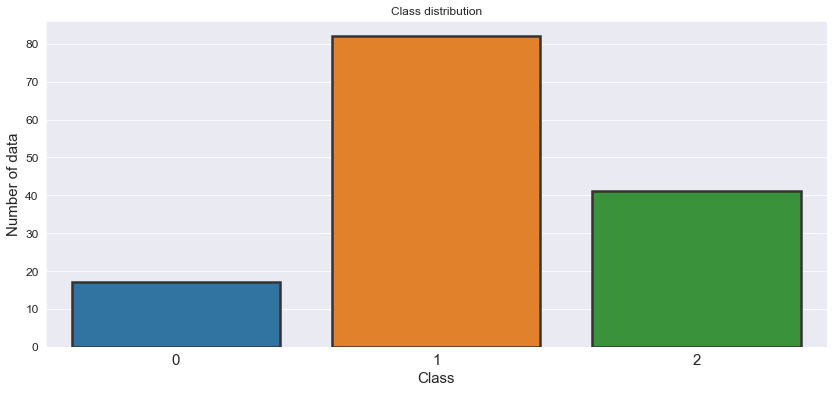

In [40]:
#plot class distribution
index = np.arange(len(label))
sns.barplot(x=label, y=lab_count, linewidth=2.5, errcolor=".2", edgecolor=".2")
plt.xlabel('Class', fontsize=15)
plt.ylabel('Number of data', fontsize=15)
plt.xticks(index, label, fontsize=15)
plt.title('Class distribution')
plt.show()

**Clearly, the data set is imbalanced**

## Due to the large amount of dimensions (903 columns) we have in the data we will be performing Dimensionality Reduction in the next section.


In [46]:
#df shape --> (rows, columns)
df_train.shape

(140, 903)

In [47]:
df_train.columns

Index(['feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6', 'feat_7',
       'feat_8', 'feat_9', 'feat_10',
       ...
       'feat_894', 'feat_895', 'feat_896', 'feat_897', 'feat_898', 'feat_899',
       'feat_900', 'feat_901', 'feat_902', 'feat_903'],
      dtype='object', length=903)

## Data preprocessing

- Because our data is a combination of categorical and numeric data, we will first extract the categorical data and perform one-hot encoder on it to make it numeric.


- Secondly, we will standardize the entirely data (including the one-hot encoded) to have a mean == 0 and standard deviation == 1, 


- This is because it is required for all data that is to be passed into Principal Component Analysis (PCA) -- simply because PCA looks for/at variance and if you do not standardize your features, they will have varying weights in the PCA which will affect the amount of variance given to each principal components in the linear subspace.  we can define PCA as the identification of a linear subspace of lower dimensionality where the largest variance in the original dataset is maintained.

In [49]:
#get the categorical columns into a dataframe

df_cat = df_train[['feat_1', 'feat_2', 'feat_3']]

In [50]:
df_cat.head()

,feat_1,feat_2,feat_3
0,right,type_3,green
1,left,type_2,blue
2,right,type_2,green
3,right,type_1,red
4,left,type_1,blue


In [51]:
df_cat.feat_1.value_counts()

left     79
right    61
Name: feat_1, dtype: int64

In [52]:
df_cat.feat_1.value_counts()

left     79
right    61
Name: feat_1, dtype: int64

In [53]:
df_cat.feat_1.value_counts()

left     79
right    61
Name: feat_1, dtype: int64

In [56]:
#get the counts of each value/class in each categorical column

df_cats = df_cat.melt(var_name='columns', value_name='values')
pd.crosstab(index=df_cats['values'], columns=df_cats['columns'])

columns,feat_1,feat_2,feat_3
values,,,
blue,0,0,36
green,0,0,51
left,79,0,0
red,0,0,53
right,61,0,0
type_1,0,44,0
type_2,0,32,0
type_3,0,64,0


In [57]:
#transform the categorical columns into binary columns

ohe = OneHotEncoder(sparse=False)
df_trans = ohe.fit_transform(df_cat)

In [58]:
df_trans

array([[0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [59]:
col_trans = make_column_transformer((ohe, ['feat_1', 'feat_2', 'feat_3']), remainder = 'passthrough')

In [61]:
#transform only the categorical columns in the train dataframe into binary columns leaving the numeric columns

df_trans = pd.DataFrame(col_trans.fit_transform(df_train))

In [62]:
#notice our dataframe has increased because of the one-hot encoded columns
df_trans.head()

,0,1,2,3,4,5,6,7,8,9,...,898,899,900,901,902,903,904,905,906,907
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.8827,3.2917,...,0.8854,-0.8752,0.2662,4.9686,2.5588,-0.6121,-3.3692,0.0550,-1.5296,-5.3041
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.4458,-2.9575,...,-4.3774,-2.2512,-1.6331,7.2724,1.7616,4.2826,5.5557,1.0588,2.6734,-4.5224
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-10.2982,-0.3714,...,-1.4408,-2.5580,-1.2116,5.1098,-0.6747,-1.2528,-2.2944,-3.4745,2.8633,1.6737
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,-8.4566,-0.2408,...,0.9434,-0.8771,0.4143,4.3368,-11.2949,-7.4289,7.9900,-6.2433,1.6592,-4.8601
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.2681,-2.2052,...,-0.2290,0.5390,0.7648,1.1348,1.9829,3.7682,-1.7092,1.4791,5.7732,-3.9106


In [63]:
#scaler
scaler = StandardScaler()

In [64]:
#lets scale
train_scale = scaler.fit_transform(df_trans)

In [66]:
#scaled data with the same weights; 
df_scale = pd.DataFrame(train_scale)
df_scale.head()

,0,1,2,3,4,5,6,7,8,9,...,898,899,900,901,902,903,904,905,906,907
0,-1.138017,1.138017,-0.677003,-0.544331,1.089725,-0.588348,1.321022,-0.780510,1.133023,0.889213,...,0.768688,0.215790,0.022132,1.396795,0.966085,-0.469344,-1.333181,0.196978,-0.668407,-1.419003
1,0.878722,-0.878722,-0.677003,1.837117,-0.917663,1.699673,-0.756990,-0.780510,1.272054,-1.191108,...,-0.921276,-0.207458,-0.533652,2.144536,0.735047,1.018660,1.526775,0.581930,0.578506,-1.204529
2,-1.138017,1.138017,-0.677003,1.837117,-0.917663,-0.588348,1.321022,-0.780510,-1.627583,-0.330211,...,0.021710,-0.301828,-0.410311,1.442625,0.028977,-0.664119,-0.988765,-1.156565,0.634844,0.495488
3,-1.138017,1.138017,1.477098,-0.544331,-0.917663,-0.588348,-0.756990,1.281214,-1.172885,-0.286735,...,0.787313,0.215205,0.065470,1.191733,-3.048889,-2.541672,2.306839,-2.218384,0.277621,-1.297184
4,0.878722,-0.878722,1.477098,-0.544331,-0.917663,1.699673,-0.756990,-0.780510,1.968891,-0.940672,...,0.410837,0.650788,0.168036,0.152465,0.799182,0.862280,-0.801239,0.743113,1.498130,-1.036670


In [68]:
#cross check if the Mean == 0 and Standard Deviation == 1

print("Mean of the dataset: ", np.mean(train_scale).round(8))
print("Standard deviation of the dataset: ", np.std(train_scale).round(8))

Mean of the dataset:  0.0
Standard deviation of the dataset:  1.0


## Feature Extraction / Dimensionality Reduction using PCA (Principal Component Analysis)

- PCA can be defined as the identification of a linear subspace of lower dimensionality where the largest variance in the original dataset is maintained.


- **Why did we use PCA:**

- First of all, We used PCA in case our features exhibited multicolinearity (two or more features are linearly dependent), this is because the principal components are **orthogonal to (i.e., uncorrelated with) the preceding or succeeding principal components.**


- Also, since our data is imbalanced, PCA is the most suited dimensionality reduction method, simply because PCA ignores class labels and focuses on finding the principal components that maximizes the variance in a given data. **Thus it is an unsupervised algorithm.**


- I used **100 principal components(PC)** because they were able to explain about 90% of the variance in the data, and also because I tried using **120** which is equivalent to explaining 93% variance but it didnt improve any of the model performance I used in the later sections compared, so I sticked with 100 PCS.


- Furthermore, because our training dataset has just 140 instances. we cannot choose past ~ 140 PCs. 


In [76]:
#lets extract features with the most variance in our dataset

pca = PCA(n_components=100)
pc = pca.fit_transform(df_scale)

In [70]:
#principal components
pc

array([[16.38706527, -6.0589946 ,  8.38416588, ...,  3.08169169,
        -1.94370113, -0.57788914],
       [15.70248449, -4.5934495 ,  0.09096411, ..., -0.69603686,
         1.9374524 ,  3.58250299],
       [-8.57623159, -2.22975613,  1.61261285, ..., -2.78323488,
         1.40623798,  1.47684115],
       ...,
       [-6.71834635, -1.4287859 ,  2.27855896, ...,  0.89496324,
         2.18786682,  2.59397707],
       [-7.65411854,  0.0874528 , -3.57211748, ...,  0.74122594,
        -1.26989577,  2.48607177],
       [-7.90568588,  0.65867623, -1.22000264, ...,  1.55923274,
         2.20965216, -2.95013239]])

In [71]:
df_pc = pd.DataFrame(data = pc, columns = ['pc_' + str(x) for x in range(1,101)])

In [72]:
#Now the columns are now the principal components and they represent the amount of variance in the dataset
df_pc.head()

,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,pc_10,...,pc_91,pc_92,pc_93,pc_94,pc_95,pc_96,pc_97,pc_98,pc_99,pc_100
0,16.387065,-6.058995,8.384166,2.364974,3.544005,0.617851,1.084719,1.443567,-1.807668,-1.624674,...,0.726050,-1.685098,-0.836544,1.749744,-1.208932,0.983156,-0.175768,3.081692,-1.943701,-0.577889
1,15.702484,-4.593449,0.090964,-1.708392,2.712919,-3.967777,-3.319761,-0.962601,-0.460542,3.069255,...,-1.271421,-1.873110,-0.513771,1.796255,-2.061472,0.108098,-0.468144,-0.696037,1.937452,3.582503
2,-8.576232,-2.229756,1.612613,7.366799,2.982232,0.918906,-3.055563,-2.813001,-6.033587,2.993969,...,3.562168,-2.696021,2.216735,0.800740,0.888942,1.384064,1.717285,-2.783235,1.406238,1.476841
3,-6.849984,0.123223,-4.929006,1.999662,-1.846568,1.779721,3.444830,1.899716,-4.471761,-0.622429,...,1.731490,2.900396,-0.798207,4.372258,1.336528,-3.415604,-1.602600,-0.201397,1.657028,-0.444199
4,15.613714,-4.726705,-2.194103,-0.076362,6.987985,3.969398,-1.122759,2.354287,2.472236,-6.083448,...,-2.593182,0.218364,3.003286,-0.467408,-0.998942,2.529843,-2.583191,2.331626,-1.582116,-2.933576


In [73]:
#the amount of variance that each principal components account for

print(pca.explained_variance_ratio_)

[0.12151846 0.04595446 0.0147367  0.01419061 0.01409927 0.01365374
 0.01337361 0.01280953 0.01250007 0.01207195 0.01203003 0.01188629
 0.0116467  0.0116066  0.01140182 0.01121366 0.01107772 0.01091144
 0.01072083 0.01058751 0.01033802 0.01020284 0.01014945 0.00993115
 0.00989057 0.0098288  0.00975203 0.00953527 0.00947306 0.00915788
 0.00892069 0.00879819 0.00873968 0.00859307 0.00848446 0.00838677
 0.00823994 0.00818118 0.00807762 0.00797514 0.00787043 0.00778379
 0.00770447 0.00758406 0.00748181 0.00741074 0.00717968 0.00716288
 0.00703356 0.00699074 0.00692012 0.00679048 0.00671424 0.00668901
 0.00653772 0.00643742 0.00635583 0.00627315 0.00622956 0.0061149
 0.00607354 0.00597356 0.00587746 0.0058572  0.00580647 0.00570105
 0.00561973 0.00554735 0.00550009 0.00539185 0.00537127 0.00527974
 0.00521472 0.00512919 0.00505207 0.0050003  0.0049323  0.00484996
 0.0047671  0.00468903 0.00465709 0.00454688 0.00453796 0.00447131
 0.00443371 0.0043568  0.00426413 0.00417642 0.00413647 0.00411

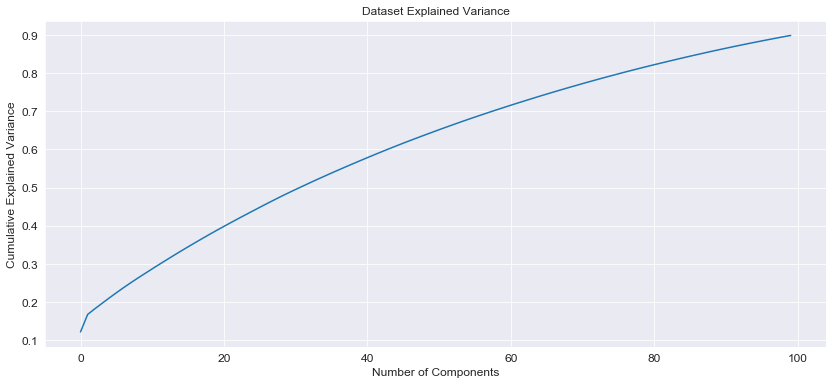

In [81]:
#Plotting the Cumulative Summation of the Explained Variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance') #for each component
plt.title('Dataset Explained Variance')
plt.show()

-  **As you observed, we reduced the dimensions from over 900 columns to 100 columns, wherein these 100 columns explain aprroximately 90% of the variance in our data which is very good for our dataset**.

### 	Implementation of Oversampling Method and Machine Learning Algorithm:


## 1st Approach 

### Oversampling of the Imbalanced dataset

### Borderline SMOTE (-Synthetic Minority Oversampling Technique) 

- SMOTE is an **over-sampling approach** in which the minority class is over-sampled by creating **“synthetic”** examples rather than by over-sampling with replacement.


- SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. 


- ***Reasons for choosing Borderline-SMOTE:***

- We used Borderline SMOTE because it takes into account minority classes at the borderline between another class that are easily misclassified.


- Also, Based on results from [Han et al., 2005](https://sci2s.ugr.es/keel/keel-dataset/pdfs/2005-Han-LNCS.pdf), Borderline SMOTE has **higher True Positive (TP) and F1-Score** when used on various datasets than the normal SMOTE 

In [83]:
#get the training data ready for oversampling and further analysis
x_trn = df_pc.values
y_trn = df_labels['label']

In [85]:
#lets over sample the data
#Note we only oversample the minority classes NOT the majority class
counter = Counter(y_trn)
print("Class count BEFORE smote: ", counter)
# transform the dataset
oversample = BorderlineSMOTE()
x_smote, y_smote = oversample.fit_resample(x_trn, y_trn)
#new class distribution
counter = Counter(y_smote)
print("Class distribution AFTER smote: ", counter)

Class count BEFORE smote:  Counter({1: 82, 2: 41, 0: 17})
Class distribution AFTER smote:  Counter({1: 82, 2: 82, 0: 82})


In [106]:
len(y_smote)

246

**As you observed, after oversampling the each class label has equal amount of counts relative to another one**

### Baseline Model 

- Baseline model - simplest possible model that other optimized models will be compared to. It will serve as our benchmark for this multiclass classification task

### GridSearch CV -- Tuning of Hyperparameters to get the best out of our desired model

- **Grid Search:**   Grid search is a method that is used to perform hyper-parameter optimisation, that is, it is a method to find the best combination of hyper-parameter. Basically, GridSearch tune multiple combinations of hyperparameters, cross validate each and determine which one gives the best performance.


- hyperparameter - a parameter whose value cannot be estimated from the data.


- **5-fold cross validation** was used through this section, it split the data into 5 bins, use each (1) bin as testing data and use (4) rest of the data as training data and validate against the testing data. Repeating this process 5 times. And thereafter, getting the average performance.

In [86]:
##Baseline model will be a starting point for us 

base_model = RandomForestClassifier()

- **The evaluation metric that we will be focusing on will be** ***accuracy, F1 - Measure, Recall, Precision and Confusion Matrix.*** **In the next sections where we will not be oversampling our dataset, so F1-Measure and Confusion Matrix will be our our Main Focus.**


- **The baseline model is going to be the basis for comparison of results with other optmized models. Also, we wont use the oversampled data as input for our baseline model since we want it to be a simple model that tells us that it is highly possible to perform multiclass classification on our data set.**

In [88]:
#This will give average evaluation metric value after 5-fold cross validation

Baseline_recall = cross_val_score(base_model, x_trn, y_trn, cv=5, scoring='recall_weighted')
print('Baseline Recall: ', np.mean(Baseline_recall))
Baseline_precision = cross_val_score(base_model, x_trn, y_trn, cv=5, scoring='precision_weighted')
print('Baseline Precision: ', np.mean(Baseline_precision))
Baseline_f1 = cross_val_score(base_model, x_trn, y_trn, cv=5, scoring='f1_weighted')
print('Baseline F1: ', np.mean(Baseline_f1))
Baseline_accuracy = cross_val_score(base_model, x_trn, y_trn, cv=5, scoring='accuracy')
print('Baseline Accuracy: ', np.mean(Baseline_accuracy))

Baseline Recall:  0.5857142857142856
Baseline Precision:  0.37256671899529037
Baseline F1:  0.4476328064700158
Baseline Accuracy:  0.5857142857142856


In [99]:
#This compute average confusion matrix after 5-fold cross validation for each model

def avg_conf_matrix(model, X, y):
    
    conf_arrays = []
    
    folds = list(StratifiedKFold(n_splits=5, shuffle=True, random_state = 42).split(X, y))
    for j, (train_idx, valid_idx) in enumerate(folds):
        X_train = X[train_idx]
        Y_train = y[train_idx]
        X_valid = X[valid_idx]
        Y_valid = y[valid_idx]
        
        model.fit(X_train, Y_train)
        valid_pred = model.predict(X_valid)
        conf = confusion_matrix(Y_valid, valid_pred)
        conf_arrays.append(conf)
        
    mean_conf_arrays = np.mean(conf_arrays, axis=0).round(0)
    print("Average confusion matrix after every fold Cross-Validation: ", "\n", mean_conf_arrays)
    

In [100]:
#base model confusion matrix:
#Notice that the model is only predicting on class 1-- this is the effect of imbalanced dataset 

avg_conf_matrix(base_model, x_trn, y_trn)

Average confusion matrix after every fold Cross-Validation:  
 [[ 0.  3.  0.]
 [ 0. 16.  0.]
 [ 0.  8.  0.]]


### RandomForest Classifier

- Random Forest Classifier (RDF) - is an ensemble machine learning algorithm that follows the bagging technique. It is an extension of the bagging estimator algorithm. In RDF, The base estimators in random forest are decision trees. 


- RDF is said to outperforms other algorithms such as support vector machine, Xgboost, LightGBM, etc., when it comes to imbalanced multiclass dataset especially when optimized appropriately.


- [Marques et al., 2017](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5249014/) ***indicated that random forest combined with the SMOTE procedure is well suited for multiclass imbalance datasets based on the utilization of the two for their own specific task.***


- After some initial data exploration and machine learning testing, I decided to use RandomForest Classifier as the major machine learning model for this task even though I still utilized LDA (since it is said to be robust for multiclass classification)

In [101]:
#lets start hyperparameter tuning
#The model we will be using is Random Forest

cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats=3, random_state = 1)

rdf = RandomForestClassifier()

params = {'max_depth': [6, 8, 10, 20], 'min_samples_split': [5, 10, 15], 
          'min_samples_leaf' : [4, 8, 12], 'n_estimators' : [300, 400, 500]}

grid_clf = GridSearchCV(estimator = rdf, param_grid = params, cv=cv, n_jobs=-1, verbose=4)
grid_clf.fit(x_smote, y_smote)

Fitting 15 folds for each of 108 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   36.8s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 605 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 1193 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:  9.6min finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                      

In [102]:
#best parameters for the model
print(grid_clf.best_params_)

{'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 400}


In [103]:
#lets get the model
rdf_smote = grid_clf.best_estimator_

In [104]:
#lets evaluate the model

rdfSmote_recall = cross_val_score(rdf_smote, x_smote, y_smote, cv=5, scoring='recall_weighted')
print('SMOTE_RDF Recall: ', np.mean(rdfSmote_recall))
rdfSmote_precision = cross_val_score(rdf_smote, x_smote, y_smote, cv=5, scoring='precision_weighted')
print('SMOTE_RDF Precision: ', np.mean(rdfSmote_precision))
rdfSmote_f1 = cross_val_score(rdf_smote, x_smote, y_smote, cv=5, scoring='f1_weighted')
print('SMOTE_RDF F1: ', np.mean(rdfSmote_f1))
rdfSmote_accuracy = cross_val_score(rdf_smote, x_smote, y_smote, cv=5, scoring='accuracy')
print('SMOTE_RDF Accuracy: ', np.mean(rdfSmote_accuracy))

SMOTE_RDF Recall:  0.8663673469387755
SMOTE_RDF Precision:  0.8966236728551934
SMOTE_RDF F1:  0.8861628390346065
SMOTE_RDF Accuracy:  0.8746122448979593


In [105]:
#SMOTE + Optimized RDFconfusion matrix:

avg_conf_matrix(rdf_smote, x_smote, y_smote)

Average confusion matrix after every fold Cross-Validation:  
 [[16.  1.  0.]
 [ 0. 15.  1.]
 [ 0.  3. 14.]]


**Notice that the number of total observations in the confusion matrix == 50, this means for every k-fold classification " ~= 50 samples are held out as validation data" and the remaining ~= 196 are used as training data.**

- This different from the baseline model number of observations which was ~= 28, because we didnt train the base model on **Oversampled data**, but ***this does not affect the performance of the evaluation metric or the others,*** as you can see **SMOTE + OPTIMIZED RANDOM FOREST** has far better performance than the **Baseline Model.** 

### 2nd Approach - Using Cost Sensitive RandomForestClassifier

- This is primarily based on the **class_weights of our model.**


- Here, We are NOT using the SMOTE data because the class weight - takes into account the imbalance in our data set, This is done by imposing a cost penalty on the minority class. Different methods of adding weight to the minority class will be evaluated in this section.


- The class_weight is a dictionary that defines each class label and the weighting to apply in the calculation of group purity for splits in the decision tree when fitting the model.

In [107]:
#first of all we will used the Define the weight for each class and perform GridSearch 
#Here, higher weight are assigned to the minority classes

cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats=3, random_state = 1)

rdf = RandomForestClassifier(class_weight = dict({0:5, 1:1, 2:2}))

params = {'max_depth': [6, 8, 10, 20], 'min_samples_split': [5, 10, 15], 
          'min_samples_leaf' : [4, 8, 12], 'n_estimators' : [300, 400, 500],}

grid_clf_weight = GridSearchCV(estimator = rdf, param_grid = params, cv=cv)
grid_clf_weight.fit(x_trn, y_trn)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 5, 1: 1, 2: 2},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samp...
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                 

In [108]:
#best parameters for the model
print(grid_clf_weight.best_params_)

{'max_depth': 20, 'min_samples_leaf': 12, 'min_samples_split': 10, 'n_estimators': 400}


In [109]:
#lets get the model
rdf_weight = grid_clf_weight.best_estimator_

In [110]:
#lets evaluate the model

rdfweight_recall = cross_val_score(rdf_weight, x_trn, y_trn, cv=5, scoring='recall_weighted')
print('Weighted_RDF Recall: ', np.mean(rdfweight_recall))
rdfweight_precision = cross_val_score(rdf_weight, x_trn, y_trn, cv=5, scoring='precision_weighted')
print('Weighted_RDF Precision: ', np.mean(rdfweight_precision))
rdfweight_f1 = cross_val_score(rdf_weight, x_trn, y_trn, cv=5, scoring='f1_weighted')
print('Weighted_RDF F1: ', np.mean(rdfweight_f1))
rdfweight_accuracy = cross_val_score(rdf_weight, x_trn, y_trn, cv=5, scoring='accuracy')
print('Weighted_RDF Accuracy: ', np.mean(rdfweight_accuracy))

Weighted_RDF Recall:  0.6
Weighted_RDF Precision:  0.5321240426240427
Weighted_RDF F1:  0.4709003298289013
Weighted_RDF Accuracy:  0.5928571428571429


In [111]:
#Cost Sensitive Optimized RDFconfusion matrix:

avg_conf_matrix(rdf_weight, x_trn, y_trn)

Average confusion matrix after every fold Cross-Validation:  
 [[ 0.  3.  0.]
 [ 0. 15.  1.]
 [ 0.  7.  1.]]


**The result of this first Weighted random classifier is similar to the baseline model, this means we need to find another way to optimize this randomclassifier**

- In the next section, we will try the **class_weight == 'balanced' argument value** AND **Random Forest With Bootstrap Class Weighting Method** on the RandomForestClassifier using gridsearch.


- "**class_weight"** argument value of ‘balanced‘ can be provided to automatically use the inverse weighting from the training dataset, giving focus to the minority class.

#### Random Forest With Bootstrap Class Weighting Method

- Given that each decision tree is constructed from a bootstrap sample (e.g. random selection with replacement), the class distribution in the data sample will be different for each tree.

- As such, it might be interesting to change the class weighting based on the class distribution in each bootstrap sample, instead of the entire training dataset.

- This can be achieved by setting the class_weight argument to the value ‘balanced_subsample‘
- [reference](https://machinelearningmastery.com/bagging-and-random-forest-for-imbalanced-classification/)

In [112]:
#let try the above-described method using GridSearchCV
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats=3, random_state = 1)

rdf = RandomForestClassifier()

params = {'max_depth': [6, 8, 10, 20], 'min_samples_split': [5, 10, 15], 
          'min_samples_leaf' : [4, 8, 12], 'n_estimators' : [300, 400, 500],
         'class_weight': ['balanced', 'balanced_subsample']}

grid_clf_bal = GridSearchCV(estimator = rdf, param_grid = params, cv=cv)
grid_clf_bal.fit(x_trn, y_trn)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split...
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [113]:
#best parameters for the model
print(grid_clf_bal.best_params_)

{'class_weight': 'balanced', 'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 10, 'n_estimators': 300}


In [114]:
#lets get the model
rdf_bal = grid_clf_bal.best_estimator_

In [115]:
#lets evaluate the model

rdfbal_recall = cross_val_score(rdf_bal, x_trn, y_trn, cv=5, scoring='recall_weighted')
print('Weighted_RDF Recall: ', np.mean(rdfbal_recall))
rdfbal_precision = cross_val_score(rdf_bal, x_trn, y_trn, cv=5, scoring='precision_weighted')
print('Weighted_RDF Precision: ', np.mean(rdfbal_precision))
rdfbal_f1 = cross_val_score(rdf_bal, x_trn, y_trn, cv=5, scoring='f1_weighted')
print('Weighted_RDF F1: ', np.mean(rdfbal_f1))
rdfbal_accuracy = cross_val_score(rdf_bal, x_trn, y_trn, cv=5, scoring='accuracy')
print('Weighted_RDF Accuracy: ', np.mean(rdfbal_accuracy))

Weighted_RDF Recall:  0.5857142857142857
Weighted_RDF Precision:  0.4014739229024943
Weighted_RDF F1:  0.4738522385698466
Weighted_RDF Accuracy:  0.6


In [116]:
#Cost Sensitive Optimized RDFconfusion matrix:

avg_conf_matrix(rdf_bal, x_trn, y_trn)

Average confusion matrix after every fold Cross-Validation:  
 [[ 0.  3.  0.]
 [ 0. 16.  0.]
 [ 0.  8.  1.]]


- **This performance of the evaluation metrics in the Weighted Random Forest Classifier does not differ much from the Baseline Model this means we are not going to further use it**

### 3rd Approach - Training the LDA - Linear Discrminant Analysis classifier on the SMOTE data

- LDA is a supervised multic-class classifier and a dimensionality reduction technique. It is used  for both classification and as a pre-processing step in Machine Learning.

- The only reason we did not use it initially as a dimensionality reduction technique is because LDA is said to be affected by imbalanced dataset.

In [120]:
#lets start hyperparameter tuning

cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats=3, random_state = 1)

#LDA classifier

lda = LDA()

params = {'solver': ['svd','lsqr','eigen']}

grid_lda = GridSearchCV(estimator = lda, param_grid = params, cv=cv, n_jobs=-1, verbose=4)
grid_lda.fit(x_smote, y_smote)

Fitting 15 folds for each of 3 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    3.4s finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             error_score=nan,
             estimator=LinearDiscriminantAnalysis(n_components=None,
                                                  priors=None, shrinkage=None,
                                                  solver='svd',
                                                  store_covariance=False,
                                                  tol=0.0001),
             iid='deprecated', n_jobs=-1,
             param_grid={'solver': ['svd', 'lsqr', 'eigen']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [121]:
#best parameters for the model
print(grid_lda.best_params_)

{'solver': 'svd'}


In [122]:
#lets get the model
lda = grid_lda.best_estimator_

In [123]:
#lets evaluate LDA classifier

lda_recall = cross_val_score(lda, x_smote, y_smote, cv=5, scoring='recall_weighted')
print('SMOTE_LDA Recall: ', np.mean(lda_recall))
lda_precision = cross_val_score(lda, x_smote, y_smote, cv=5, scoring='precision_weighted')
print('SMOTE_LDA Precision: ', np.mean(lda_precision))
lda_f1 = cross_val_score(lda, x_smote, y_smote, cv=5, scoring='f1_weighted')
print('SMOTE_LDA F1: ', np.mean(lda_f1))
lda_accuracy = cross_val_score(lda, x_smote, y_smote, cv=5, scoring='accuracy')
print('SMOTE_LDA Accuracy: ', np.mean(lda_accuracy))

SMOTE_LDA Recall:  0.8251428571428571
SMOTE_LDA Precision:  0.8398435474258056
SMOTE_LDA F1:  0.813885825793885
SMOTE_LDA Accuracy:  0.8251428571428571


In [124]:
#SMOTE + Optimized RDFconfusion matrix:

avg_conf_matrix(lda, x_smote, y_smote)

Average confusion matrix after every fold Cross-Validation:  
 [[16.  0.  0.]
 [ 2. 12.  2.]
 [ 1.  1. 15.]]


**The SMOTE + LDA combination also performs far better than the Baseline Model and the Weighted RandomForestClassifier**

### Load in Test Data and generate predictions on the data using the SMOTE_RDF model (has the highest evaluation score)

- Before we perform predictions on the test data, we must perform one-hot encoder on its categorical columns, then transform the entire data using the scaler method we used earlier and finally transform it also using the PCA we used earlier. Note: We only perform **Transformation on the data not FITTING for both Scaler and PCA**.

In [125]:
#load in test data
df_test = pd.read_csv('test_features.csv', names = ['feat_' + str(x) for x in range(1,904)])

In [126]:

df_test.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_894,feat_895,feat_896,feat_897,feat_898,feat_899,feat_900,feat_901,feat_902,feat_903
0,left,type_1,blue,-0.0911,0.5625,1.8206,-5.1902,3.0139,-1.4510,-4.9192,...,-2.6555,5.5905,7.7045,4.3253,0.7936,-0.6663,2.3355,0.3455,-2.0936,3.0695
1,right,type_3,green,-7.9454,-1.9499,1.1313,-0.2745,3.6763,1.2331,-0.7179,...,3.5414,-0.6960,2.5997,-0.7971,-5.1642,-0.7928,-1.8232,0.6038,-6.7637,-1.8046
2,right,type_3,blue,-4.9606,2.6980,0.0592,2.0149,1.7465,4.3341,6.7963,...,1.4680,-5.9941,2.4825,1.0533,0.4715,3.4329,-2.8285,-1.5425,6.9466,-2.8522
3,right,type_2,blue,1.9404,-1.1492,-2.7282,0.8090,3.4097,2.0182,-1.1578,...,-0.5082,-0.2061,4.1618,-2.7309,4.6747,-0.3183,1.3629,1.3480,5.3539,-4.7206
4,left,type_2,blue,-6.6614,-2.3878,-2.0364,-4.9774,3.7972,-1.9987,-0.4928,...,-2.6871,0.3611,-3.2261,1.8367,-0.5666,-3.0393,-2.2726,3.9492,-0.9959,4.9632


In [127]:
df_test.shape

(560, 903)

In [128]:
col_trans = make_column_transformer((ohe, ['feat_1', 'feat_2', 'feat_3']), remainder = 'passthrough')

In [129]:
#transformed the categorical columns in the test data to binary columns
df_trans_tst = pd.DataFrame(col_trans.fit_transform(df_test))

In [130]:
df_trans_tst.head()

,0,1,2,3,4,5,6,7,8,9,...,898,899,900,901,902,903,904,905,906,907
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.0911,0.5625,...,-2.6555,5.5905,7.7045,4.3253,0.7936,-0.6663,2.3355,0.3455,-2.0936,3.0695
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-7.9454,-1.9499,...,3.5414,-0.6960,2.5997,-0.7971,-5.1642,-0.7928,-1.8232,0.6038,-6.7637,-1.8046
2,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,-4.9606,2.6980,...,1.4680,-5.9941,2.4825,1.0533,0.4715,3.4329,-2.8285,-1.5425,6.9466,-2.8522
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.9404,-1.1492,...,-0.5082,-0.2061,4.1618,-2.7309,4.6747,-0.3183,1.3629,1.3480,5.3539,-4.7206
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-6.6614,-2.3878,...,-2.6871,0.3611,-3.2261,1.8367,-0.5666,-3.0393,-2.2726,3.9492,-0.9959,4.9632


In [131]:
#just transform
tst_scale = scaler.transform(df_trans_tst)

In [132]:
pc_test = pca.transform(tst_scale)

In [133]:
x_test = pd.DataFrame(pc_test, columns = ['pc_' + str(x) for x in range(1,101)])

In [134]:
#let perform prediction on the test data

test_pred = rdf_smote.predict(x_test)

In [137]:
df_tst_pred = pd.DataFrame(test_pred)

### Save the predicted test labels into a CSV file

In [138]:
df_tst_pred.to_csv('test_labels.csv', index=False, header=False)

### Summary

- This task was focused on performing multiclass classification on **imbalanced multiclass dataset with large number of columns**.


- Data preprocessing techniques such as One-hot Encoder and Standardization were utilized for preparing the data for further analysis.


- Dimensionality Reduction was done on the training dataset to be able to reduce and eliminate redundant features in the data and further keep only features or principal components that explains the variance in the data.


- Three approach were utilized to combat both the imbalance and large number of column problems in our data.


- RandomForest Classifier was the major machine learning model utilized in this classification as it is an ensemble machine learning algorithm that follows the bagging technique, that is said to perform more better than other bagging and boosting techniques when optimized appropriately.


- Finally, Borderline SMOTE + Optimized Random Forest Classifier were the best approach for this multiclass classification task.


### Outlook

- ***More advanced dimensionality reduction, oversampling and machine learning technique such as t-SNE, ADASYN, Artificial Neural Network Autoencoders,  can be further tried on this multiclass classification problem to get better evaluation scores.***